Parameters of the best solution : [3. 3. 0. 0. 3. 0. 0. 1. 0. 2. 2. 0. 0. 3. 3. 3. 3. 0. 1. 0. 3. 0. 0. 3.
 1. 0. 3. 0. 3. 3.]
Fitness value of the best solution = -0.0


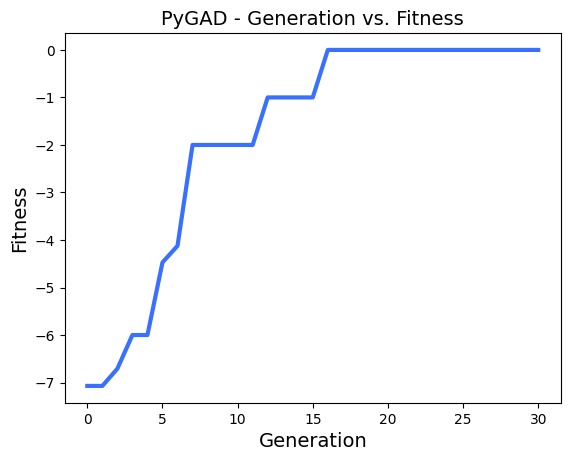

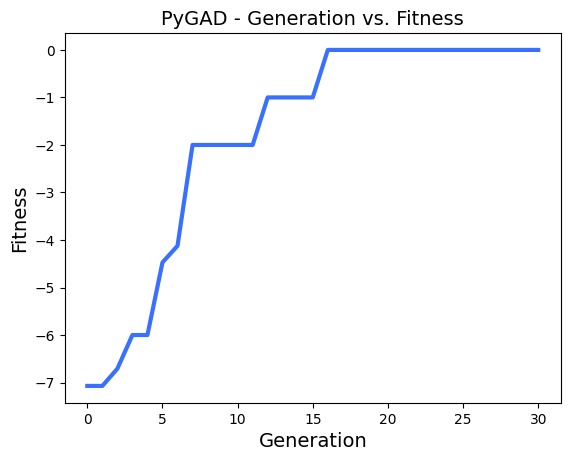

In [19]:
import pygad
import numpy as np

# 0 - wall, 1 - empty path, 2 - start, 3 - exit
labyrinth = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0],
                      [0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0],
                      [0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0],
                      [0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
                      [0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0],
                      [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0],
                      [0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0],
                      [0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0],
                      [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0],
                      [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# definiujemy parametry chromosomu

gene_space = [0, 1, 2, 3]

# definiujemy funkcję fitness

def findStartPoint(nparray):
        return list(zip(*np.where(nparray == 2)))[0]
    
def findExitPoint(nparray):
        return list(zip(*np.where(nparray == 3)))[0]

def getDistance(presentPlace, exitPoint):
    aSquare = (presentPlace[0] - exitPoint[0]) ** 2
    bSquare = (presentPlace[1] - exitPoint[1]) ** 2
    return np.sqrt(aSquare + bSquare)

# 0 - right, 1 - left, 2 - up, 3 - down
def computeMoves(startPoint, solution):
    presentPlace = startPoint

    # if next move hits the wall, do not move
    for i in solution:
        if i == 0:
            if labyrinth[presentPlace[0], presentPlace[1] + 1] != 0:
                presentPlace[1] += 1
        elif i == 1:
            if labyrinth[presentPlace[0], presentPlace[1] - 1] != 0:
                presentPlace[1] -= 1
        elif i == 2:
            if labyrinth[presentPlace[0] - 1, presentPlace[1]] != 0:
                presentPlace[0] -= 1
        elif i == 3:
            if labyrinth[presentPlace[0] + 1, presentPlace[1]] != 0:
                presentPlace[0] += 1
            
    return presentPlace

def fitness_func(solution, solution_idx):
    startPoint = [0, 0]
    startPoint[0] = findStartPoint(labyrinth)[0]
    startPoint[1] = findStartPoint(labyrinth)[1]  # type: ignore

    exitPoint = [0, 0]
    exitPoint[0] = findExitPoint(labyrinth)[0]  # type: ignore
    exitPoint[1] = findExitPoint(labyrinth)[1]  # type: ignore
    

    presentPlace = computeMoves(startPoint, solution)
    distance = -getDistance(presentPlace, exitPoint)
    
    if solution[0] == exitPoint[0] and solution[1] == exitPoint[1]:
        distance += 2137
    return distance
    

fitness_function = fitness_func

# ile chromsomów w populacji
# ile genow ma chromosom
sol_per_pop = 200
num_genes = 30

# ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
# ile pokolen
# ilu rodzicow zachowac (kilka procent)
num_parents_mating = 100
num_generations = 30
keep_parents = 2

# jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

# w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

# mutacja ma dzialac na ilu procent genow?
# trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 4

# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

# uruchomienie algorytmu
ga_instance.run()

# podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(
    solution_fitness=solution_fitness))

# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()
